In [1]:
#  pip install plotly==5.6.0

In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# 0. Get Data

In [3]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv")

In [4]:
data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [5]:
data.shape

(520, 17)

# 1. Data Prep

In [6]:
data.columns = [i.lower().replace(" ","_") for i in data.columns]

### Check null

In [7]:
data.isna().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

### Check dups

In [8]:
# data.duplicated().sum()

In [9]:
# data = data.drop_duplicates().reset_index(drop=True)

### Data Types

In [10]:
data.dtypes

age                    int64
gender                object
polyuria              object
polydipsia            object
sudden_weight_loss    object
weakness              object
polyphagia            object
genital_thrush        object
visual_blurring       object
itching               object
irritability          object
delayed_healing       object
partial_paresis       object
muscle_stiffness      object
alopecia              object
obesity               object
class                 object
dtype: object

### clean target col

In [11]:
data["class"].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [12]:
data["target"] = data.apply(lambda df: True if df["class"]=="Positive" else False, axis=1)

In [13]:
data["target"].value_counts()

True     320
False    200
Name: target, dtype: int64

In [14]:
data = data.drop(columns=["class"])

### clean feature cols

In [15]:
data.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'target'],
      dtype='object')

In [16]:
target_col = "target"

In [17]:
feature_cols = [i for i in data.columns if "target" not in i]

In [18]:
data[feature_cols].dtypes

age                    int64
gender                object
polyuria              object
polydipsia            object
sudden_weight_loss    object
weakness              object
polyphagia            object
genital_thrush        object
visual_blurring       object
itching               object
irritability          object
delayed_healing       object
partial_paresis       object
muscle_stiffness      object
alopecia              object
obesity               object
dtype: object

In [19]:
bool_cols = [i for i in feature_cols if "age" not in i and "gender" not in i]

In [20]:
data[bool_cols] = data[bool_cols] == "Yes"

In [21]:
data.head().T

,0,1,2,3,4
age,40,58,41,45,60
gender,Male,Male,Male,Male,Male
polyuria,False,False,True,False,True
polydipsia,True,False,False,False,True
sudden_weight_loss,False,False,False,True,True
weakness,True,True,True,True,True
polyphagia,False,False,True,True,True
genital_thrush,False,False,False,True,False
visual_blurring,False,True,False,False,True
itching,True,False,True,True,True


### One Hot encode

In [22]:
data["is_male"] = data.gender == "Male"

In [23]:
data = data.drop(columns=["gender"])

# 2. EDA

In [35]:
feature_cols = [i for i in data.columns if "target" not in i]

In [36]:
feature_cols

['age',
 'polyuria',
 'polydipsia',
 'sudden_weight_loss',
 'weakness',
 'polyphagia',
 'genital_thrush',
 'visual_blurring',
 'itching',
 'irritability',
 'delayed_healing',
 'partial_paresis',
 'muscle_stiffness',
 'alopecia',
 'obesity',
 'is_male']

In [37]:
target_col

'target'

## Age

In [38]:
# data.age

In [39]:
fig = px.histogram(data, x=data.age, color="target", log_x=False,log_y=False,hover_data=data.columns)
fig.update_layout(
    title_text='Distribution of Age', # title of plot
    title_x=0.5,
    xaxis_title_text='Age', # xaxis label
    yaxis_title_text='Counts', # yaxis label
    showlegend= True,
    legend_title_text='Is diabetes'
)
fig.show()

In [40]:
data.polyuria.unique()

array([False,  True])

In [41]:
data.polyuria

0      False
1      False
2       True
3      False
4       True
       ...  
515     True
516     True
517     True
518    False
519    False
Name: polyuria, Length: 520, dtype: bool

In [42]:
to_plot = data[["polyuria","age","target"]].groupby(["polyuria","target"]).count().unstack()

In [43]:
to_plot

age     
target   False True
polyuria           
False      185   77
True        15  243

In [44]:
def cat_bar_plot(feature, df):

    to_plot = df[[feature,"age","target"]].groupby([feature,"target"]).count().unstack()
    to_plot.columns = to_plot.columns.droplevel(0)
    wide_df = px.data.medals_wide()

    fig = px.bar(to_plot,
#                 color_discrete_sequence=['#008AD9', '#893168'],
                )
    fig.update_layout(
        title={
            'text':  f"{feature}",
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        xaxis_title='Categories',
        # legend_traceorder="reversed",
        yaxis_title='Counts',
        font=dict(size=10,),
        legend_title="Class",
        legend={'traceorder':'reversed'}
    )
    return fig

In [45]:
cat_bar_plot("polyuria", data)

# 3. Modeling

In [57]:
# pip install indoorplants

In [55]:
# pip install mlflow

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, \
                            precision_score, \
                            recall_score, \
                            confusion_matrix, \
                            f1_score


In [49]:
# from modeling repo
from indoorplants.analysis import exploratory
from indoorplants.validation import crossvalidate, curves

In [51]:
y = data.target
X = data[[i for i in data.columns if "target" not in i]]

In [52]:
X.columns

Index(['age', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
       'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'is_male'],
      dtype='object')

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [54]:
X_train.shape

(468, 16)

In [55]:
X_test.shape

(52, 16)

In [56]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [57]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

### Predict

In [58]:
y_pred = clf.predict(X_test)

### Accuracy

In [59]:
clf.score(X_test, y_test)

0.9423076923076923

### Hyperparameter tuning

In [60]:
np.arange(10, 100, 10)

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

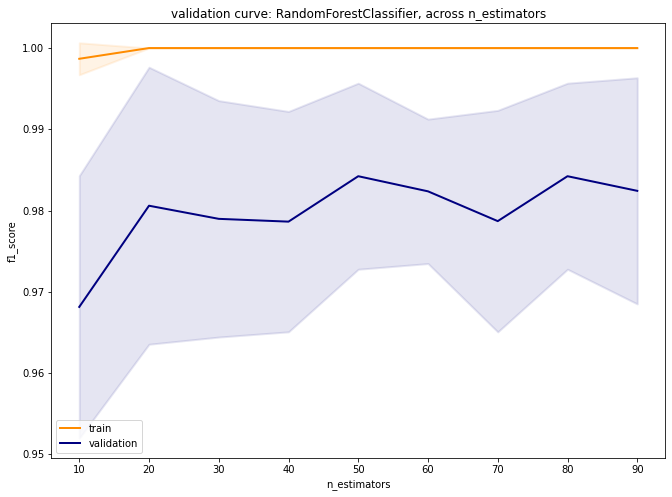

In [91]:
curves.validation_curve(model_type=RandomForestClassifier,
                        X=X_train,
                        y=y_train,
                        param_name='n_estimators',
                        param_range=np.arange(10, 100, 10),
                        other_params={'class_weight':'balanced_subsample'},
                        score=f1_score)

In [61]:
np.linspace(4, 16, 7)

array([ 4.,  6.,  8., 10., 12., 14., 16.])

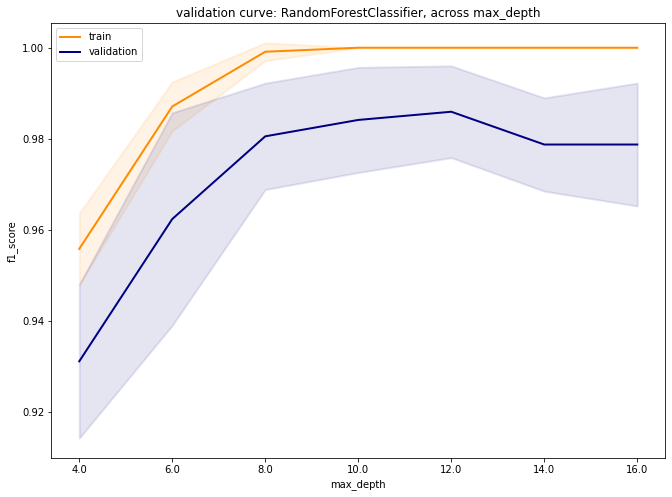

In [93]:
curves.validation_curve(model_type=RandomForestClassifier,
                        X=X_train,
                        y=y_train,
                        param_name='max_depth',
                        param_range=np.linspace(4, 16, 7),
                        other_params={'class_weight':'balanced_subsample',
                                      'n_estimators':50},
                        score=f1_score)

### We are going to use this very simple model in the Dash App

In [62]:
model = RandomForestClassifier(n_estimators=50,
               class_weight='balanced_subsample',
               max_depth=8)

In [63]:
model = model.fit(X_train, y_train)

In [64]:
y_pred=model.predict(X_test)

In [70]:
confusion_matrix(y_test, y_pred)

array([[17,  0],
       [ 0, 35]])

In [76]:
# model.predict_proba(X_test)

In [74]:
# pd.DataFrame([y_pred, y_test]).T